In [1]:
from adc_controller import AdcController
from adc_logger import AdcLogger

logger = AdcLogger()
controller = AdcController(logger)

2025-01-08 14:03:26 [DEBUG] Initializing AdcController


In [2]:
controller.find_devices()
controller.connect()


2025-01-08 14:03:26 [INFO] Starting the process to find devices...
2025-01-08 14:03:27 [INFO] ID 0: BusHardwareId(���� ���� ����* 11 (TAP-Windows Adapter V9 - SecuwaySSLU)) [bus hardware: Network Adapter, protocol: EtherCAT, hardware specifier: {6F66967D-2C7A-453E-9BE9-B3C3C041A83C}]
2025-01-08 14:03:27 [INFO] ID 1: BusHardwareId(Wi-Fi (Intel(R) Wi-Fi 6E AX211 160MHz)) [bus hardware: Network Adapter, protocol: EtherCAT, hardware specifier: {85B9F7EF-9B8F-408F-ABBC-374426446F5C}]
2025-01-08 14:03:27 [INFO] ID 2: BusHardwareId(Serial Port (COM3)) [bus hardware: Serial Port, protocol: MODBUS RTU, hardware specifier: COM3]
2025-01-08 14:03:27 [INFO] ID 3: BusHardwareId(Serial Port (COM4)) [bus hardware: Serial Port, protocol: MODBUS RTU, hardware specifier: COM4]
2025-01-08 14:03:27 [INFO] ID 4: BusHardwareId(USB Bus) [bus hardware: USB BUS, protocol: MODBUS VCP, hardware specifier: UsbRoot0, extra hardware specifier: UsbBusVcp]
2025-01-08 14:03:27 [INFO] ID 5: BusHardwareId(���� ���� ����

Scan started.
.............................................................................................................................

2025-01-08 14:03:54 [INFO] Device 1 added successfully.
2025-01-08 14:03:54 [INFO] Device 2 added successfully.



Scan finished.


2025-01-08 14:03:54 [INFO] Device 1 connected successfully.
2025-01-08 14:03:54 [INFO] Device 2 connected successfully.


In [3]:
controller.read_motor_position(1)

1875

In [4]:
controller.read_motor_position(2)

1907

In [5]:
import asyncio

await asyncio.gather(
    asyncio.to_thread(controller.move_motor, 1, -1000, 5),
    asyncio.to_thread(controller.move_motor, 2, -1000, 5)
)

2025-01-08 14:03:54 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:03:54 [DEBUG] Moving Motor 2 to position -1000 with velocity 5


[{'initial_position': 1875,
  'final_position': 875,
  'position_change': -1000,
  'execution_time': 4.339163064956665},
 {'initial_position': 1907,
  'final_position': 908,
  'position_change': -999,
  'execution_time': 4.368829011917114}]

In [6]:
await controller.homing()
first_pos1 = controller.read_motor_position(1)
first_pos2 = controller.read_motor_position(2)

2025-01-08 14:03:59 [INFO] Initializing homing process for Motor...
2025-01-08 14:03:59 [INFO] Finding home position for Motor...
2025-01-08 14:03:59 [INFO] Monitoring raw value for Motor 1...


None


2025-01-08 14:03:59 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:04:02 [DEBUG] Stopping Motor 1
2025-01-08 14:04:02 [INFO] Motor 1 stopped successfully.
2025-01-08 14:04:02 [ERROR] Motor 1 halt failed.
2025-01-08 14:04:02 [INFO] Home position found for Motor 1.
2025-01-08 14:04:02 [DEBUG] Stopping Motor 2
2025-01-08 14:04:02 [INFO] Motor 2 stopped successfully.
2025-01-08 14:04:02 [ERROR] Motor 2 halt failed.
2025-01-08 14:04:02 [INFO] Home position found for Motor 2.
2025-01-08 14:04:03 [INFO] Home position for Motor 1 : 1848
2025-01-08 14:04:03 [INFO] Home position for Motor 2 : 1917
2025-01-08 14:04:03 [INFO] Homing complete. Home position:
2025-01-08 14:04:03 [INFO]  Motor 1: 1848, Motor 2: 1917
2025-01-08 14:04:03 [INFO] Current position:
2025-01-08 14:04:03 [INFO]  Motor 1: 1848, Motor 2: 1917


In [7]:
import matplotlib.pyplot as plt

pos1_list = []
pos2_list = []
for i in range(30):
    await controller.homing()
    pos1 = controller.read_motor_position(1)
    pos1_list.append(first_pos1-pos1)
    pos2 = controller.read_motor_position(2)
    pos2_list.append(first_pos2-pos2)
    await asyncio.gather(
        asyncio.to_thread(controller.move_motor, 1, -1000, 5),
        asyncio.to_thread(controller.move_motor, 2, -1000, 5)
    )

2025-01-08 14:04:03 [INFO] Initializing homing process for Motor...
2025-01-08 14:04:03 [INFO] Finding home position for Motor...
2025-01-08 14:04:03 [INFO] Monitoring raw value for Motor 1...


None


2025-01-08 14:04:03 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:04:03 [DEBUG] Stopping Motor 1
2025-01-08 14:04:03 [INFO] Motor 1 stopped successfully.
2025-01-08 14:04:03 [ERROR] Motor 1 halt failed.
2025-01-08 14:04:03 [INFO] Home position found for Motor 1.
2025-01-08 14:04:03 [DEBUG] Stopping Motor 2
2025-01-08 14:04:03 [INFO] Motor 2 stopped successfully.
2025-01-08 14:04:03 [ERROR] Motor 2 halt failed.
2025-01-08 14:04:03 [INFO] Home position found for Motor 2.
2025-01-08 14:04:04 [INFO] Home position for Motor 1 : 1952
2025-01-08 14:04:04 [INFO] Home position for Motor 2 : 2018
2025-01-08 14:04:04 [INFO] Homing complete. Home position:
2025-01-08 14:04:04 [INFO]  Motor 1: 1952, Motor 2: 2018
2025-01-08 14:04:04 [INFO] Current position:
2025-01-08 14:04:04 [INFO]  Motor 1: 1952, Motor 2: 2018
2025-01-08 14:04:04 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:04:04 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:04:08 [IN

None


2025-01-08 14:04:08 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:04:11 [DEBUG] Stopping Motor 1
2025-01-08 14:04:11 [INFO] Motor 1 stopped successfully.
2025-01-08 14:04:11 [ERROR] Motor 1 halt failed.
2025-01-08 14:04:11 [INFO] Home position found for Motor 1.
2025-01-08 14:04:11 [DEBUG] Stopping Motor 2
2025-01-08 14:04:11 [INFO] Motor 2 stopped successfully.
2025-01-08 14:04:11 [ERROR] Motor 2 halt failed.
2025-01-08 14:04:11 [INFO] Home position found for Motor 2.
2025-01-08 14:04:11 [INFO] Home position for Motor 1 : 1863
2025-01-08 14:04:11 [INFO] Home position for Motor 2 : 1927
2025-01-08 14:04:11 [INFO] Homing complete. Home position:
2025-01-08 14:04:11 [INFO]  Motor 1: 1863, Motor 2: 1927
2025-01-08 14:04:11 [INFO] Current position:
2025-01-08 14:04:11 [INFO]  Motor 1: 1863, Motor 2: 1927
2025-01-08 14:04:11 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:04:11 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:04:16 [IN

None


2025-01-08 14:04:16 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:04:19 [DEBUG] Stopping Motor 2
2025-01-08 14:04:19 [INFO] Motor 2 stopped successfully.
2025-01-08 14:04:19 [ERROR] Motor 2 halt failed.
2025-01-08 14:04:19 [INFO] Home position found for Motor 2.
2025-01-08 14:04:19 [DEBUG] Stopping Motor 1
2025-01-08 14:04:19 [INFO] Motor 1 stopped successfully.
2025-01-08 14:04:19 [ERROR] Motor 1 halt failed.
2025-01-08 14:04:19 [INFO] Home position found for Motor 1.
2025-01-08 14:04:19 [INFO] Home position for Motor 1 : 1889
2025-01-08 14:04:19 [INFO] Home position for Motor 2 : 1906
2025-01-08 14:04:19 [INFO] Homing complete. Home position:
2025-01-08 14:04:19 [INFO]  Motor 1: 1889, Motor 2: 1906
2025-01-08 14:04:19 [INFO] Current position:
2025-01-08 14:04:20 [INFO]  Motor 1: 1889, Motor 2: 1906
2025-01-08 14:04:20 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:04:20 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:04:24 [IN

None


2025-01-08 14:04:24 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:04:27 [DEBUG] Stopping Motor 1
2025-01-08 14:04:27 [INFO] Motor 1 stopped successfully.
2025-01-08 14:04:27 [ERROR] Motor 1 halt failed.
2025-01-08 14:04:27 [INFO] Home position found for Motor 1.
2025-01-08 14:04:28 [DEBUG] Stopping Motor 2
2025-01-08 14:04:28 [INFO] Motor 2 stopped successfully.
2025-01-08 14:04:28 [ERROR] Motor 2 halt failed.
2025-01-08 14:04:28 [INFO] Home position found for Motor 2.
2025-01-08 14:04:28 [INFO] Home position for Motor 1 : 1867
2025-01-08 14:04:28 [INFO] Home position for Motor 2 : 1920
2025-01-08 14:04:28 [INFO] Homing complete. Home position:
2025-01-08 14:04:28 [INFO]  Motor 1: 1867, Motor 2: 1920
2025-01-08 14:04:28 [INFO] Current position:
2025-01-08 14:04:28 [INFO]  Motor 1: 1867, Motor 2: 1920
2025-01-08 14:04:28 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:04:28 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:04:32 [IN

None


2025-01-08 14:04:32 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:04:36 [DEBUG] Stopping Motor 1
2025-01-08 14:04:36 [INFO] Motor 1 stopped successfully.
2025-01-08 14:04:36 [ERROR] Motor 1 halt failed.
2025-01-08 14:04:36 [INFO] Home position found for Motor 1.
2025-01-08 14:04:36 [DEBUG] Stopping Motor 2
2025-01-08 14:04:36 [INFO] Motor 2 stopped successfully.
2025-01-08 14:04:36 [ERROR] Motor 2 halt failed.
2025-01-08 14:04:36 [INFO] Home position found for Motor 2.
2025-01-08 14:04:36 [INFO] Home position for Motor 1 : 1874
2025-01-08 14:04:36 [INFO] Home position for Motor 2 : 1925
2025-01-08 14:04:36 [INFO] Homing complete. Home position:
2025-01-08 14:04:36 [INFO]  Motor 1: 1874, Motor 2: 1925
2025-01-08 14:04:36 [INFO] Current position:
2025-01-08 14:04:36 [INFO]  Motor 1: 1874, Motor 2: 1925
2025-01-08 14:04:36 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:04:36 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:04:40 [IN

None


2025-01-08 14:04:40 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:04:44 [DEBUG] Stopping Motor 1
2025-01-08 14:04:44 [INFO] Motor 1 stopped successfully.
2025-01-08 14:04:44 [ERROR] Motor 1 halt failed.
2025-01-08 14:04:44 [INFO] Home position found for Motor 1.
2025-01-08 14:04:44 [DEBUG] Stopping Motor 2
2025-01-08 14:04:44 [INFO] Motor 2 stopped successfully.
2025-01-08 14:04:44 [ERROR] Motor 2 halt failed.
2025-01-08 14:04:44 [INFO] Home position found for Motor 2.
2025-01-08 14:04:44 [INFO] Home position for Motor 1 : 1847
2025-01-08 14:04:44 [INFO] Home position for Motor 2 : 1930
2025-01-08 14:04:44 [INFO] Homing complete. Home position:
2025-01-08 14:04:44 [INFO]  Motor 1: 1847, Motor 2: 1930
2025-01-08 14:04:44 [INFO] Current position:
2025-01-08 14:04:44 [INFO]  Motor 1: 1847, Motor 2: 1930
2025-01-08 14:04:44 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:04:44 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:04:48 [IN

None


2025-01-08 14:04:49 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:04:52 [DEBUG] Stopping Motor 2
2025-01-08 14:04:52 [INFO] Motor 2 stopped successfully.
2025-01-08 14:04:52 [ERROR] Motor 2 halt failed.
2025-01-08 14:04:52 [INFO] Home position found for Motor 2.
2025-01-08 14:04:52 [DEBUG] Stopping Motor 1
2025-01-08 14:04:52 [INFO] Motor 1 stopped successfully.
2025-01-08 14:04:52 [ERROR] Motor 1 halt failed.
2025-01-08 14:04:52 [INFO] Home position found for Motor 1.
2025-01-08 14:04:52 [INFO] Home position for Motor 1 : 1873
2025-01-08 14:04:52 [INFO] Home position for Motor 2 : 1910
2025-01-08 14:04:52 [INFO] Homing complete. Home position:
2025-01-08 14:04:52 [INFO]  Motor 1: 1873, Motor 2: 1910
2025-01-08 14:04:52 [INFO] Current position:
2025-01-08 14:04:52 [INFO]  Motor 1: 1873, Motor 2: 1910
2025-01-08 14:04:52 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:04:52 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:04:56 [IN

None


2025-01-08 14:04:57 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:05:00 [DEBUG] Stopping Motor 1
2025-01-08 14:05:00 [INFO] Motor 1 stopped successfully.
2025-01-08 14:05:00 [ERROR] Motor 1 halt failed.
2025-01-08 14:05:00 [INFO] Home position found for Motor 1.
2025-01-08 14:05:00 [DEBUG] Stopping Motor 2
2025-01-08 14:05:00 [INFO] Motor 2 stopped successfully.
2025-01-08 14:05:00 [ERROR] Motor 2 halt failed.
2025-01-08 14:05:00 [INFO] Home position found for Motor 2.
2025-01-08 14:05:00 [INFO] Home position for Motor 1 : 1855
2025-01-08 14:05:00 [INFO] Home position for Motor 2 : 1925
2025-01-08 14:05:00 [INFO] Homing complete. Home position:
2025-01-08 14:05:00 [INFO]  Motor 1: 1855, Motor 2: 1925
2025-01-08 14:05:00 [INFO] Current position:
2025-01-08 14:05:00 [INFO]  Motor 1: 1855, Motor 2: 1925
2025-01-08 14:05:00 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:05:00 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:05:05 [IN

None


2025-01-08 14:05:05 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:05:08 [DEBUG] Stopping Motor 2
2025-01-08 14:05:08 [INFO] Motor 2 stopped successfully.
2025-01-08 14:05:08 [ERROR] Motor 2 halt failed.
2025-01-08 14:05:08 [INFO] Home position found for Motor 2.
2025-01-08 14:05:08 [DEBUG] Stopping Motor 1
2025-01-08 14:05:08 [INFO] Motor 1 stopped successfully.
2025-01-08 14:05:08 [ERROR] Motor 1 halt failed.
2025-01-08 14:05:08 [INFO] Home position found for Motor 1.
2025-01-08 14:05:08 [INFO] Home position for Motor 1 : 1881
2025-01-08 14:05:08 [INFO] Home position for Motor 2 : 1904
2025-01-08 14:05:08 [INFO] Homing complete. Home position:
2025-01-08 14:05:08 [INFO]  Motor 1: 1881, Motor 2: 1904
2025-01-08 14:05:08 [INFO] Current position:
2025-01-08 14:05:08 [INFO]  Motor 1: 1881, Motor 2: 1904
2025-01-08 14:05:08 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:05:08 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:05:13 [IN

None


2025-01-08 14:05:13 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:05:16 [DEBUG] Stopping Motor 1
2025-01-08 14:05:16 [INFO] Motor 1 stopped successfully.
2025-01-08 14:05:16 [ERROR] Motor 1 halt failed.
2025-01-08 14:05:16 [INFO] Home position found for Motor 1.
2025-01-08 14:05:16 [DEBUG] Stopping Motor 2
2025-01-08 14:05:16 [INFO] Motor 2 stopped successfully.
2025-01-08 14:05:16 [ERROR] Motor 2 halt failed.
2025-01-08 14:05:16 [INFO] Home position found for Motor 2.
2025-01-08 14:05:16 [INFO] Home position for Motor 1 : 1849
2025-01-08 14:05:16 [INFO] Home position for Motor 2 : 1904
2025-01-08 14:05:16 [INFO] Homing complete. Home position:
2025-01-08 14:05:16 [INFO]  Motor 1: 1849, Motor 2: 1904
2025-01-08 14:05:16 [INFO] Current position:
2025-01-08 14:05:16 [INFO]  Motor 1: 1849, Motor 2: 1904
2025-01-08 14:05:16 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:05:16 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:05:21 [IN

None


2025-01-08 14:05:21 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:05:24 [DEBUG] Stopping Motor 1
2025-01-08 14:05:24 [INFO] Motor 1 stopped successfully.
2025-01-08 14:05:24 [ERROR] Motor 1 halt failed.
2025-01-08 14:05:24 [INFO] Home position found for Motor 1.
2025-01-08 14:05:24 [DEBUG] Stopping Motor 2
2025-01-08 14:05:25 [INFO] Motor 2 stopped successfully.
2025-01-08 14:05:25 [ERROR] Motor 2 halt failed.
2025-01-08 14:05:25 [INFO] Home position found for Motor 2.
2025-01-08 14:05:25 [INFO] Home position for Motor 1 : 1860
2025-01-08 14:05:25 [INFO] Home position for Motor 2 : 1909
2025-01-08 14:05:25 [INFO] Homing complete. Home position:
2025-01-08 14:05:25 [INFO]  Motor 1: 1860, Motor 2: 1909
2025-01-08 14:05:25 [INFO] Current position:
2025-01-08 14:05:25 [INFO]  Motor 1: 1860, Motor 2: 1909
2025-01-08 14:05:25 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:05:25 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:05:29 [IN

None


2025-01-08 14:05:29 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:05:33 [DEBUG] Stopping Motor 1
2025-01-08 14:05:33 [INFO] Motor 1 stopped successfully.
2025-01-08 14:05:33 [ERROR] Motor 1 halt failed.
2025-01-08 14:05:33 [INFO] Home position found for Motor 1.
2025-01-08 14:05:33 [DEBUG] Stopping Motor 2
2025-01-08 14:05:33 [INFO] Motor 2 stopped successfully.
2025-01-08 14:05:33 [ERROR] Motor 2 halt failed.
2025-01-08 14:05:33 [INFO] Home position found for Motor 2.
2025-01-08 14:05:33 [INFO] Home position for Motor 1 : 1862
2025-01-08 14:05:33 [INFO] Home position for Motor 2 : 1914
2025-01-08 14:05:33 [INFO] Homing complete. Home position:
2025-01-08 14:05:33 [INFO]  Motor 1: 1862, Motor 2: 1914
2025-01-08 14:05:33 [INFO] Current position:
2025-01-08 14:05:33 [INFO]  Motor 1: 1862, Motor 2: 1914
2025-01-08 14:05:33 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:05:33 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:05:37 [IN

None


2025-01-08 14:05:37 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:05:41 [DEBUG] Stopping Motor 1
2025-01-08 14:05:41 [INFO] Motor 1 stopped successfully.
2025-01-08 14:05:41 [ERROR] Motor 1 halt failed.
2025-01-08 14:05:41 [INFO] Home position found for Motor 1.
2025-01-08 14:05:41 [DEBUG] Stopping Motor 2
2025-01-08 14:05:41 [INFO] Motor 2 stopped successfully.
2025-01-08 14:05:41 [ERROR] Motor 2 halt failed.
2025-01-08 14:05:41 [INFO] Home position found for Motor 2.
2025-01-08 14:05:41 [INFO] Home position for Motor 1 : 1873
2025-01-08 14:05:41 [INFO] Home position for Motor 2 : 1928
2025-01-08 14:05:41 [INFO] Homing complete. Home position:
2025-01-08 14:05:41 [INFO]  Motor 1: 1873, Motor 2: 1928
2025-01-08 14:05:41 [INFO] Current position:
2025-01-08 14:05:41 [INFO]  Motor 1: 1873, Motor 2: 1928
2025-01-08 14:05:41 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:05:41 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:05:45 [IN

None


2025-01-08 14:05:46 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:05:49 [DEBUG] Stopping Motor 1
2025-01-08 14:05:49 [INFO] Motor 1 stopped successfully.
2025-01-08 14:05:49 [ERROR] Motor 1 halt failed.
2025-01-08 14:05:49 [INFO] Home position found for Motor 1.
2025-01-08 14:05:49 [DEBUG] Stopping Motor 2
2025-01-08 14:05:49 [INFO] Motor 2 stopped successfully.
2025-01-08 14:05:49 [ERROR] Motor 2 halt failed.
2025-01-08 14:05:49 [INFO] Home position found for Motor 2.
2025-01-08 14:05:49 [INFO] Home position for Motor 1 : 1856
2025-01-08 14:05:49 [INFO] Home position for Motor 2 : 1914
2025-01-08 14:05:49 [INFO] Homing complete. Home position:
2025-01-08 14:05:49 [INFO]  Motor 1: 1856, Motor 2: 1914
2025-01-08 14:05:49 [INFO] Current position:
2025-01-08 14:05:49 [INFO]  Motor 1: 1856, Motor 2: 1914
2025-01-08 14:05:49 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:05:49 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:05:53 [IN

None


2025-01-08 14:05:54 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:05:57 [DEBUG] Stopping Motor 1
2025-01-08 14:05:57 [INFO] Motor 1 stopped successfully.
2025-01-08 14:05:57 [ERROR] Motor 1 halt failed.
2025-01-08 14:05:57 [INFO] Home position found for Motor 1.
2025-01-08 14:05:57 [DEBUG] Stopping Motor 2
2025-01-08 14:05:57 [INFO] Motor 2 stopped successfully.
2025-01-08 14:05:57 [ERROR] Motor 2 halt failed.
2025-01-08 14:05:57 [INFO] Home position found for Motor 2.
2025-01-08 14:05:57 [INFO] Home position for Motor 1 : 1867
2025-01-08 14:05:57 [INFO] Home position for Motor 2 : 1918
2025-01-08 14:05:57 [INFO] Homing complete. Home position:
2025-01-08 14:05:57 [INFO]  Motor 1: 1867, Motor 2: 1918
2025-01-08 14:05:57 [INFO] Current position:
2025-01-08 14:05:57 [INFO]  Motor 1: 1867, Motor 2: 1918
2025-01-08 14:05:57 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:05:57 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:06:02 [IN

None


2025-01-08 14:06:02 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:06:05 [DEBUG] Stopping Motor 1
2025-01-08 14:06:05 [INFO] Motor 1 stopped successfully.
2025-01-08 14:06:05 [ERROR] Motor 1 halt failed.
2025-01-08 14:06:05 [INFO] Home position found for Motor 1.
2025-01-08 14:06:05 [DEBUG] Stopping Motor 2
2025-01-08 14:06:05 [INFO] Motor 2 stopped successfully.
2025-01-08 14:06:05 [ERROR] Motor 2 halt failed.
2025-01-08 14:06:05 [INFO] Home position found for Motor 2.
2025-01-08 14:06:05 [INFO] Home position for Motor 1 : 1845
2025-01-08 14:06:05 [INFO] Home position for Motor 2 : 1921
2025-01-08 14:06:05 [INFO] Homing complete. Home position:
2025-01-08 14:06:05 [INFO]  Motor 1: 1845, Motor 2: 1921
2025-01-08 14:06:05 [INFO] Current position:
2025-01-08 14:06:05 [INFO]  Motor 1: 1845, Motor 2: 1921
2025-01-08 14:06:05 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:06:05 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:06:10 [IN

None


2025-01-08 14:06:10 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:06:13 [DEBUG] Stopping Motor 1
2025-01-08 14:06:13 [INFO] Motor 1 stopped successfully.
2025-01-08 14:06:13 [ERROR] Motor 1 halt failed.
2025-01-08 14:06:13 [INFO] Home position found for Motor 1.
2025-01-08 14:06:13 [DEBUG] Stopping Motor 2
2025-01-08 14:06:13 [INFO] Motor 2 stopped successfully.
2025-01-08 14:06:13 [ERROR] Motor 2 halt failed.
2025-01-08 14:06:13 [INFO] Home position found for Motor 2.
2025-01-08 14:06:13 [INFO] Home position for Motor 1 : 1856
2025-01-08 14:06:13 [INFO] Home position for Motor 2 : 1930
2025-01-08 14:06:13 [INFO] Homing complete. Home position:
2025-01-08 14:06:13 [INFO]  Motor 1: 1856, Motor 2: 1930
2025-01-08 14:06:13 [INFO] Current position:
2025-01-08 14:06:13 [INFO]  Motor 1: 1856, Motor 2: 1930
2025-01-08 14:06:14 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:06:14 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:06:18 [IN

None


2025-01-08 14:06:18 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:06:21 [DEBUG] Stopping Motor 2
2025-01-08 14:06:21 [INFO] Motor 2 stopped successfully.
2025-01-08 14:06:21 [ERROR] Motor 2 halt failed.
2025-01-08 14:06:21 [INFO] Home position found for Motor 2.
2025-01-08 14:06:21 [DEBUG] Stopping Motor 1
2025-01-08 14:06:21 [INFO] Motor 1 stopped successfully.
2025-01-08 14:06:21 [ERROR] Motor 1 halt failed.
2025-01-08 14:06:22 [INFO] Home position found for Motor 1.
2025-01-08 14:06:22 [INFO] Home position for Motor 1 : 1877
2025-01-08 14:06:22 [INFO] Home position for Motor 2 : 1906
2025-01-08 14:06:22 [INFO] Homing complete. Home position:
2025-01-08 14:06:22 [INFO]  Motor 1: 1877, Motor 2: 1906
2025-01-08 14:06:22 [INFO] Current position:
2025-01-08 14:06:22 [INFO]  Motor 1: 1877, Motor 2: 1906
2025-01-08 14:06:22 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:06:22 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:06:26 [IN

None


2025-01-08 14:06:26 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:06:29 [DEBUG] Stopping Motor 1
2025-01-08 14:06:29 [INFO] Motor 1 stopped successfully.
2025-01-08 14:06:29 [ERROR] Motor 1 halt failed.
2025-01-08 14:06:29 [INFO] Home position found for Motor 1.
2025-01-08 14:06:30 [DEBUG] Stopping Motor 2
2025-01-08 14:06:30 [INFO] Motor 2 stopped successfully.
2025-01-08 14:06:30 [ERROR] Motor 2 halt failed.
2025-01-08 14:06:30 [INFO] Home position found for Motor 2.
2025-01-08 14:06:30 [INFO] Home position for Motor 1 : 1855
2025-01-08 14:06:30 [INFO] Home position for Motor 2 : 1912
2025-01-08 14:06:30 [INFO] Homing complete. Home position:
2025-01-08 14:06:30 [INFO]  Motor 1: 1855, Motor 2: 1912
2025-01-08 14:06:30 [INFO] Current position:
2025-01-08 14:06:30 [INFO]  Motor 1: 1855, Motor 2: 1911
2025-01-08 14:06:30 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:06:30 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:06:34 [IN

None


2025-01-08 14:06:34 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:06:38 [DEBUG] Stopping Motor 1
2025-01-08 14:06:38 [INFO] Motor 1 stopped successfully.
2025-01-08 14:06:38 [ERROR] Motor 1 halt failed.
2025-01-08 14:06:38 [INFO] Home position found for Motor 1.
2025-01-08 14:06:38 [DEBUG] Stopping Motor 2
2025-01-08 14:06:38 [INFO] Motor 2 stopped successfully.
2025-01-08 14:06:38 [ERROR] Motor 2 halt failed.
2025-01-08 14:06:38 [INFO] Home position found for Motor 2.
2025-01-08 14:06:38 [INFO] Home position for Motor 1 : 1866
2025-01-08 14:06:38 [INFO] Home position for Motor 2 : 1926
2025-01-08 14:06:38 [INFO] Homing complete. Home position:
2025-01-08 14:06:38 [INFO]  Motor 1: 1866, Motor 2: 1926
2025-01-08 14:06:38 [INFO] Current position:
2025-01-08 14:06:38 [INFO]  Motor 1: 1866, Motor 2: 1926
2025-01-08 14:06:38 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:06:38 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:06:42 [IN

None


2025-01-08 14:06:43 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:06:46 [DEBUG] Stopping Motor 2
2025-01-08 14:06:46 [INFO] Motor 2 stopped successfully.
2025-01-08 14:06:46 [ERROR] Motor 2 halt failed.
2025-01-08 14:06:46 [INFO] Home position found for Motor 2.
2025-01-08 14:06:46 [DEBUG] Stopping Motor 1
2025-01-08 14:06:46 [INFO] Motor 1 stopped successfully.
2025-01-08 14:06:46 [ERROR] Motor 1 halt failed.
2025-01-08 14:06:46 [INFO] Home position found for Motor 1.
2025-01-08 14:06:46 [INFO] Home position for Motor 1 : 1892
2025-01-08 14:06:46 [INFO] Home position for Motor 2 : 1906
2025-01-08 14:06:46 [INFO] Homing complete. Home position:
2025-01-08 14:06:46 [INFO]  Motor 1: 1892, Motor 2: 1906
2025-01-08 14:06:46 [INFO] Current position:
2025-01-08 14:06:46 [INFO]  Motor 1: 1892, Motor 2: 1906
2025-01-08 14:06:46 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:06:46 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:06:50 [IN

None


2025-01-08 14:06:51 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:06:54 [DEBUG] Stopping Motor 1
2025-01-08 14:06:54 [INFO] Motor 1 stopped successfully.
2025-01-08 14:06:54 [ERROR] Motor 1 halt failed.
2025-01-08 14:06:54 [INFO] Home position found for Motor 1.
2025-01-08 14:06:54 [DEBUG] Stopping Motor 2
2025-01-08 14:06:54 [INFO] Motor 2 stopped successfully.
2025-01-08 14:06:54 [ERROR] Motor 2 halt failed.
2025-01-08 14:06:54 [INFO] Home position found for Motor 2.
2025-01-08 14:06:54 [INFO] Home position for Motor 1 : 1865
2025-01-08 14:06:54 [INFO] Home position for Motor 2 : 1920
2025-01-08 14:06:54 [INFO] Homing complete. Home position:
2025-01-08 14:06:54 [INFO]  Motor 1: 1865, Motor 2: 1920
2025-01-08 14:06:54 [INFO] Current position:
2025-01-08 14:06:54 [INFO]  Motor 1: 1865, Motor 2: 1920
2025-01-08 14:06:54 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:06:54 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:06:59 [IN

None


2025-01-08 14:06:59 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:07:02 [DEBUG] Stopping Motor 1
2025-01-08 14:07:02 [INFO] Motor 1 stopped successfully.
2025-01-08 14:07:02 [ERROR] Motor 1 halt failed.
2025-01-08 14:07:02 [INFO] Home position found for Motor 1.
2025-01-08 14:07:02 [DEBUG] Stopping Motor 2
2025-01-08 14:07:02 [INFO] Motor 2 stopped successfully.
2025-01-08 14:07:02 [ERROR] Motor 2 halt failed.
2025-01-08 14:07:02 [INFO] Home position found for Motor 2.
2025-01-08 14:07:02 [INFO] Home position for Motor 1 : 1876
2025-01-08 14:07:02 [INFO] Home position for Motor 2 : 1934
2025-01-08 14:07:02 [INFO] Homing complete. Home position:
2025-01-08 14:07:02 [INFO]  Motor 1: 1876, Motor 2: 1934
2025-01-08 14:07:02 [INFO] Current position:
2025-01-08 14:07:02 [INFO]  Motor 1: 1876, Motor 2: 1934
2025-01-08 14:07:02 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:07:02 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:07:07 [IN

None


2025-01-08 14:07:07 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:07:10 [DEBUG] Stopping Motor 1
2025-01-08 14:07:10 [INFO] Motor 1 stopped successfully.
2025-01-08 14:07:10 [ERROR] Motor 1 halt failed.
2025-01-08 14:07:10 [INFO] Home position found for Motor 1.
2025-01-08 14:07:10 [DEBUG] Stopping Motor 2
2025-01-08 14:07:10 [INFO] Motor 2 stopped successfully.
2025-01-08 14:07:10 [ERROR] Motor 2 halt failed.
2025-01-08 14:07:10 [INFO] Home position found for Motor 2.
2025-01-08 14:07:11 [INFO] Home position for Motor 1 : 1844
2025-01-08 14:07:11 [INFO] Home position for Motor 2 : 1935
2025-01-08 14:07:11 [INFO] Homing complete. Home position:
2025-01-08 14:07:11 [INFO]  Motor 1: 1844, Motor 2: 1935
2025-01-08 14:07:11 [INFO] Current position:
2025-01-08 14:07:11 [INFO]  Motor 1: 1844, Motor 2: 1935
2025-01-08 14:07:11 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:07:11 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:07:15 [IN

None


2025-01-08 14:07:15 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:07:18 [DEBUG] Stopping Motor 2
2025-01-08 14:07:19 [INFO] Motor 2 stopped successfully.
2025-01-08 14:07:19 [ERROR] Motor 2 halt failed.
2025-01-08 14:07:19 [INFO] Home position found for Motor 2.
2025-01-08 14:07:19 [DEBUG] Stopping Motor 1
2025-01-08 14:07:19 [INFO] Motor 1 stopped successfully.
2025-01-08 14:07:19 [ERROR] Motor 1 halt failed.
2025-01-08 14:07:19 [INFO] Home position found for Motor 1.
2025-01-08 14:07:19 [INFO] Home position for Motor 1 : 1865
2025-01-08 14:07:19 [INFO] Home position for Motor 2 : 1912
2025-01-08 14:07:19 [INFO] Homing complete. Home position:
2025-01-08 14:07:19 [INFO]  Motor 1: 1865, Motor 2: 1912
2025-01-08 14:07:19 [INFO] Current position:
2025-01-08 14:07:19 [INFO]  Motor 1: 1865, Motor 2: 1912
2025-01-08 14:07:19 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:07:19 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:07:23 [IN

None


2025-01-08 14:07:23 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:07:27 [DEBUG] Stopping Motor 1
2025-01-08 14:07:27 [INFO] Motor 1 stopped successfully.
2025-01-08 14:07:27 [ERROR] Motor 1 halt failed.
2025-01-08 14:07:27 [INFO] Home position found for Motor 1.
2025-01-08 14:07:27 [DEBUG] Stopping Motor 2
2025-01-08 14:07:27 [INFO] Motor 2 stopped successfully.
2025-01-08 14:07:27 [ERROR] Motor 2 halt failed.
2025-01-08 14:07:27 [INFO] Home position found for Motor 2.
2025-01-08 14:07:27 [INFO] Home position for Motor 1 : 1852
2025-01-08 14:07:27 [INFO] Home position for Motor 2 : 1923
2025-01-08 14:07:27 [INFO] Homing complete. Home position:
2025-01-08 14:07:27 [INFO]  Motor 1: 1852, Motor 2: 1923
2025-01-08 14:07:27 [INFO] Current position:
2025-01-08 14:07:27 [INFO]  Motor 1: 1852, Motor 2: 1923
2025-01-08 14:07:27 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:07:27 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:07:31 [IN

None


2025-01-08 14:07:32 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:07:35 [DEBUG] Stopping Motor 1
2025-01-08 14:07:35 [INFO] Motor 1 stopped successfully.
2025-01-08 14:07:35 [ERROR] Motor 1 halt failed.
2025-01-08 14:07:35 [INFO] Home position found for Motor 1.
2025-01-08 14:07:35 [DEBUG] Stopping Motor 2
2025-01-08 14:07:35 [INFO] Motor 2 stopped successfully.
2025-01-08 14:07:35 [ERROR] Motor 2 halt failed.
2025-01-08 14:07:35 [INFO] Home position found for Motor 2.
2025-01-08 14:07:35 [INFO] Home position for Motor 1 : 1854
2025-01-08 14:07:35 [INFO] Home position for Motor 2 : 1924
2025-01-08 14:07:35 [INFO] Homing complete. Home position:
2025-01-08 14:07:35 [INFO]  Motor 1: 1854, Motor 2: 1924
2025-01-08 14:07:35 [INFO] Current position:
2025-01-08 14:07:35 [INFO]  Motor 1: 1854, Motor 2: 1924
2025-01-08 14:07:35 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:07:35 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:07:39 [IN

None


2025-01-08 14:07:40 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:07:43 [DEBUG] Stopping Motor 2
2025-01-08 14:07:43 [INFO] Motor 2 stopped successfully.
2025-01-08 14:07:43 [ERROR] Motor 2 halt failed.
2025-01-08 14:07:43 [INFO] Home position found for Motor 2.
2025-01-08 14:07:43 [DEBUG] Stopping Motor 1
2025-01-08 14:07:43 [INFO] Motor 1 stopped successfully.
2025-01-08 14:07:43 [ERROR] Motor 1 halt failed.
2025-01-08 14:07:43 [INFO] Home position found for Motor 1.
2025-01-08 14:07:43 [INFO] Home position for Motor 1 : 1880
2025-01-08 14:07:43 [INFO] Home position for Motor 2 : 1904
2025-01-08 14:07:43 [INFO] Homing complete. Home position:
2025-01-08 14:07:43 [INFO]  Motor 1: 1880, Motor 2: 1904
2025-01-08 14:07:43 [INFO] Current position:
2025-01-08 14:07:43 [INFO]  Motor 1: 1880, Motor 2: 1904
2025-01-08 14:07:43 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:07:43 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:07:48 [IN

None


2025-01-08 14:07:48 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:07:51 [DEBUG] Stopping Motor 1
2025-01-08 14:07:51 [INFO] Motor 1 stopped successfully.
2025-01-08 14:07:51 [ERROR] Motor 1 halt failed.
2025-01-08 14:07:51 [INFO] Home position found for Motor 1.
2025-01-08 14:07:51 [DEBUG] Stopping Motor 2
2025-01-08 14:07:51 [INFO] Motor 2 stopped successfully.
2025-01-08 14:07:51 [ERROR] Motor 2 halt failed.
2025-01-08 14:07:51 [INFO] Home position found for Motor 2.
2025-01-08 14:07:51 [INFO] Home position for Motor 1 : 1858
2025-01-08 14:07:51 [INFO] Home position for Motor 2 : 1919
2025-01-08 14:07:51 [INFO] Homing complete. Home position:
2025-01-08 14:07:51 [INFO]  Motor 1: 1858, Motor 2: 1919
2025-01-08 14:07:51 [INFO] Current position:
2025-01-08 14:07:51 [INFO]  Motor 1: 1858, Motor 2: 1919
2025-01-08 14:07:51 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:07:51 [DEBUG] Moving Motor 2 to position -1000 with velocity 5
2025-01-08 14:07:56 [IN

None


2025-01-08 14:07:56 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:07:59 [DEBUG] Stopping Motor 1
2025-01-08 14:07:59 [INFO] Motor 1 stopped successfully.
2025-01-08 14:07:59 [ERROR] Motor 1 halt failed.
2025-01-08 14:07:59 [INFO] Home position found for Motor 1.
2025-01-08 14:07:59 [DEBUG] Stopping Motor 2
2025-01-08 14:07:59 [INFO] Motor 2 stopped successfully.
2025-01-08 14:07:59 [ERROR] Motor 2 halt failed.
2025-01-08 14:07:59 [INFO] Home position found for Motor 2.
2025-01-08 14:07:59 [INFO] Home position for Motor 1 : 1865
2025-01-08 14:07:59 [INFO] Home position for Motor 2 : 1928
2025-01-08 14:07:59 [INFO] Homing complete. Home position:
2025-01-08 14:07:59 [INFO]  Motor 1: 1865, Motor 2: 1928
2025-01-08 14:07:59 [INFO] Current position:
2025-01-08 14:07:59 [INFO]  Motor 1: 1865, Motor 2: 1928
2025-01-08 14:08:00 [DEBUG] Moving Motor 1 to position -1000 with velocity 5
2025-01-08 14:08:00 [DEBUG] Moving Motor 2 to position -1000 with velocity 5


In [8]:
print(first_pos1, first_pos2)
print(pos1_list)
print(pos2_list)

1848 1917
[-104, -15, -41, -19, -26, 1, -25, -7, -33, -1, -12, -14, -25, -8, -19, 3, -8, -29, -7, -18, -44, -17, -28, 4, -17, -4, -6, -32, -10, -17]
[-101, -10, 11, -3, -8, -13, 7, -8, 13, 13, 8, 3, -11, 3, -1, -4, -13, 11, 6, -9, 11, -3, -17, -18, 5, -6, -7, 13, -2, -11]


In [18]:
# 리스트에서 첫번째 값 삭제
pos1_list.pop(0)
pos2_list.pop(0)

-101

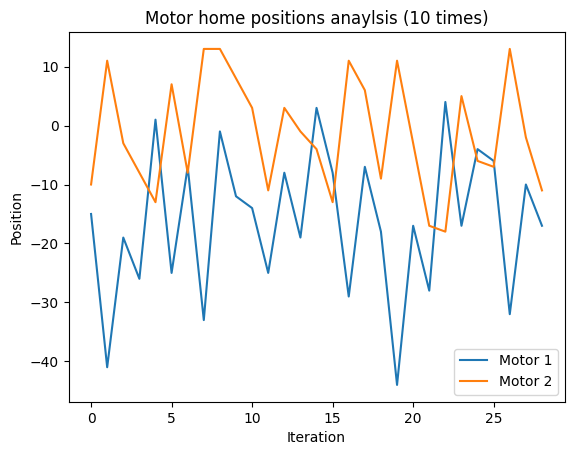

In [19]:

# 추후에 모터 회전 속도가 정확도, 정밀도에 영향을 주는지도 확인
# 현재는 velocity 5로 설정되어 있음. 
# 일단 속도 고정해두고 10번 반복해서 확인해보자.
# degree 정확도, 정밀도 확인 -> 어느 정도로 정밀해야 ADC가 안정적인지 여쭤보기.

import numpy as np

# Constants
COUNTS_PER_REVOLUTION = 16200
COUNTS_TO_DEGREES = 360 / COUNTS_PER_REVOLUTION

# Convert counts to degrees
pos1_degrees = [p * COUNTS_TO_DEGREES for p in pos1_list]
pos2_degrees = [p * COUNTS_TO_DEGREES for p in pos2_list]

# Statistical analysis
mean_pos1_deg = np.mean(pos1_degrees)
std_pos1_deg = np.std(pos1_degrees)
mean_pos2_deg = np.mean(pos2_degrees)
std_pos2_deg = np.std(pos2_degrees)

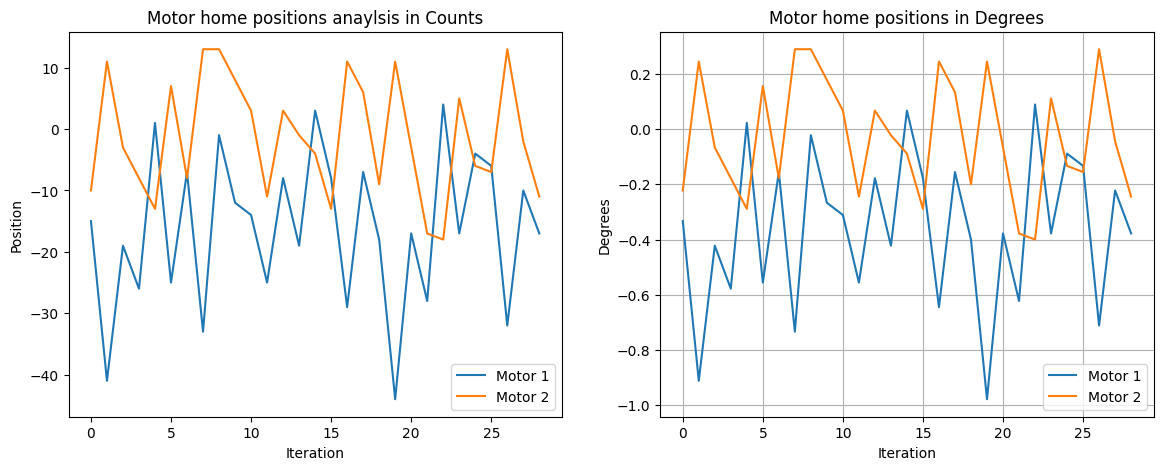

In [28]:
# count plot 왼쪽에 degree plot를 오른쪽에 출력해해 한그림에 같이 보여주는 것이 좋을 것 같다.
# Plotting
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(pos1_list)
plt.plot(pos2_list)
plt.xlabel('Iteration')
plt.ylabel('Position')
plt.legend(['Motor 1', 'Motor 2'])
plt.title('Motor home positions anaylsis in Counts')

plt.subplot(1, 2, 2)
plt.plot(pos1_degrees, label="Motor 1")
plt.plot(pos2_degrees, label="Motor 2")
plt.title('Motor home positions in Degrees')
plt.xlabel('Iteration')
plt.ylabel('Degrees')
plt.legend()
plt.grid()
plt.show()


In [21]:
print('Motor 1: ', pos1_list)
print('Motor 2: ', pos2_list)

Motor 1:  [-15, -41, -19, -26, 1, -25, -7, -33, -1, -12, -14, -25, -8, -19, 3, -8, -29, -7, -18, -44, -17, -28, 4, -17, -4, -6, -32, -10, -17]
Motor 2:  [-10, 11, -3, -8, -13, 7, -8, 13, 13, 8, 3, -11, 3, -1, -4, -13, 11, 6, -9, 11, -3, -17, -18, 5, -6, -7, 13, -2, -11]


In [22]:
import numpy as np

# Convert position lists to numpy arrays for easier computation
pos1_array = np.array(pos1_list)
pos2_array = np.array(pos2_list)

# Compute statistics
mean_pos1 = np.mean(pos1_array)
std_pos1 = np.std(pos1_array)
mean_pos2 = np.mean(pos2_array)
std_pos2 = np.std(pos2_array)

print("Position statistics in counts:")
print(f"Motor 1 - Mean: {mean_pos1}, Std Dev: {std_pos1}")
print(f"Motor 2 - Mean: {mean_pos2}, Std Dev: {std_pos2}")

# Constants
COUNTS_PER_REVOLUTION = 16200
COUNTS_TO_DEGREES = 360 / COUNTS_PER_REVOLUTION

# Convert counts to degrees
mean_pos1_degree = mean_pos1 * COUNTS_TO_DEGREES
std_pos1_degree = std_pos1 * COUNTS_TO_DEGREES
mean_pos2_degree = mean_pos2 * COUNTS_TO_DEGREES
std_pos2_degree = std_pos2 * COUNTS_TO_DEGREES

print("Position statistics in degrees:")
print(f"Motor 1 - Mean: {mean_pos1_degree}, Std Dev: {std_pos1_degree}")
print(f"Motor 2 - Mean: {mean_pos2_degree}, Std Dev: {std_pos2_degree}")

Position statistics in counts:
Motor 1 - Mean: -16.344827586206897, Std Dev: 12.34078145982818
Motor 2 - Mean: -1.3793103448275863, Std Dev: 9.528229538852715
Position statistics in degrees:
Motor 1 - Mean: -0.3632183908045977, Std Dev: 0.2742395879961818
Motor 2 - Mean: -0.030651340996168584, Std Dev: 0.211738434196727


In [23]:
# Assume ground truth positions for motors (replace these with known values if available)
ground_truth_pos1 = pos1_array[0] # Replace with actual expected position for Motor 1
ground_truth_pos2 = pos2_array[0]  # Replace with actual expected position for Motor 2

# Calculate errors
errors_pos1 = pos1_array - ground_truth_pos1
errors_pos2 = pos2_array - ground_truth_pos2

# Compute mean absolute error (MAE) and maximum error
mae_pos1 = np.mean(np.abs(errors_pos1))
mae_pos2 = np.mean(np.abs(errors_pos2))
max_error_pos1 = np.max(np.abs(errors_pos1))
max_error_pos2 = np.max(np.abs(errors_pos2))

print("Error statistics in counts:")
print(f"Motor 1 - MAE: {mae_pos1}, Max Error: {max_error_pos1}")
print(f"Motor 2 - MAE: {mae_pos2}, Max Error: {max_error_pos2}")

# convert to degrees
mae_pos1_degree = mae_pos1 * COUNTS_TO_DEGREES
mae_pos2_degree = mae_pos2 * COUNTS_TO_DEGREES
max_error_pos1_degree = max_error_pos1 * COUNTS_TO_DEGREES
max_error_pos2_degree = max_error_pos2 * COUNTS_TO_DEGREES

print("Error statistics in degrees:")
print(f"Motor 1 - MAE: {mae_pos1_degree}, Max Error: {max_error_pos1_degree}")
print(f"Motor 2 - MAE: {mae_pos2_degree}, Max Error: {max_error_pos2_degree}")


Error statistics in counts:
Motor 1 - MAE: 10.03448275862069, Max Error: 29
Motor 2 - MAE: 10.206896551724139, Max Error: 23
Error statistics in degrees:
Motor 1 - MAE: 0.22298850574712648, Max Error: 0.6444444444444445
Motor 2 - MAE: 0.22681992337164752, Max Error: 0.5111111111111112


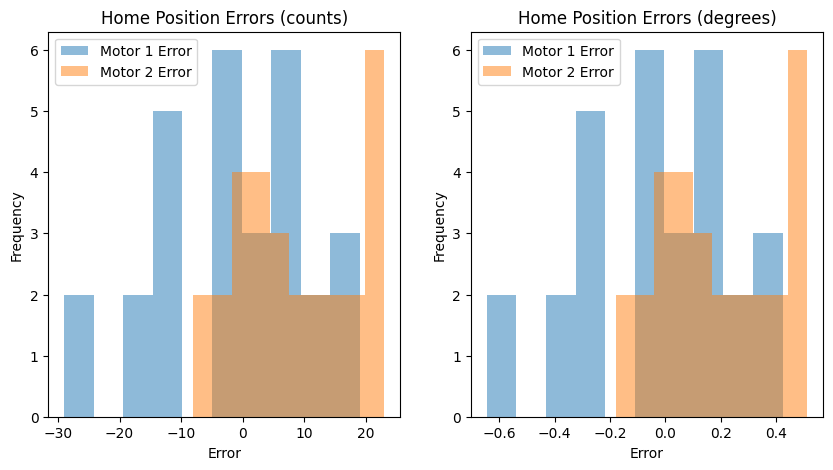

In [25]:
# count error를 왼쪽에 degree error를 오른쪽에 출력해해 한그림에 같이 보여주는 것이 좋을 것 같다.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(errors_pos1, bins=10, alpha=0.5, label='Motor 1 Error')
plt.hist(errors_pos2, bins=10, alpha=0.5, label='Motor 2 Error')
plt.title('Home Position Errors (counts)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(errors_pos1 * COUNTS_TO_DEGREES, bins=10, alpha=0.5, label='Motor 1 Error')
plt.hist(errors_pos2 * COUNTS_TO_DEGREES, bins=10, alpha=0.5, label='Motor 2 Error')
plt.title('Home Position Errors (degrees)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [16]:
await controller.homing()

2025-01-08 14:08:06 [INFO] Initializing homing process for Motor...
2025-01-08 14:08:06 [INFO] Finding home position for Motor...
2025-01-08 14:08:06 [INFO] Monitoring raw value for Motor 1...


None


2025-01-08 14:08:06 [INFO] Monitoring raw value for Motor 2...
2025-01-08 14:08:09 [DEBUG] Stopping Motor 1
2025-01-08 14:08:09 [INFO] Motor 1 stopped successfully.
2025-01-08 14:08:09 [ERROR] Motor 1 halt failed.
2025-01-08 14:08:09 [INFO] Home position found for Motor 1.
2025-01-08 14:08:09 [DEBUG] Stopping Motor 2
2025-01-08 14:08:09 [INFO] Motor 2 stopped successfully.
2025-01-08 14:08:09 [ERROR] Motor 2 halt failed.
2025-01-08 14:08:09 [INFO] Home position found for Motor 2.
2025-01-08 14:08:09 [INFO] Home position for Motor 1 : 1866
2025-01-08 14:08:09 [INFO] Home position for Motor 2 : 1928
2025-01-08 14:08:09 [INFO] Homing complete. Home position:
2025-01-08 14:08:09 [INFO]  Motor 1: 1866, Motor 2: 1928
2025-01-08 14:08:09 [INFO] Current position:
2025-01-08 14:08:09 [INFO]  Motor 1: 1866, Motor 2: 1928


In [17]:
#controller.disconnect()
#controller.power_off()